In [2]:
# libraries
import os
from dotenv import load_dotenv
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# connect to the database

# load environment variables from .env file
load_dotenv()

# get database connection details from environment variables
DB_NAME = os.getenv('DB_NAME')
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_HOST = os.getenv('DB_HOST', 'localhost')
DB_PORT = os.getenv('DB_PORT', '5432')

# connect to the database
conn = psycopg2.connect(
    dbname=DB_NAME,
    user=DB_USER,
    password=DB_PASSWORD,
    host=DB_HOST,
    port=DB_PORT
)

cursor = conn.cursor()


/var/folders/6v/kx15yglj19173xqgq1g6f46r0000gn/T/ipykernel_11510/37707522.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_data = pd.read_sql(


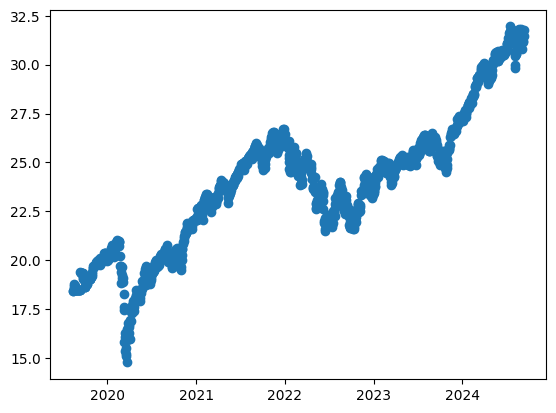

In [14]:
# load the stock data from the database

selected_stock = 'XEQT.TO'
stock_data = pd.read_sql(
    f"SELECT * FROM public.stocks WHERE ticker = '{selected_stock}'",
    conn)

stock_data['date'] = pd.to_datetime(stock_data['date'])

stock_data

# plot scatter plot of close price vs date
plt.scatter(stock_data['date'], stock_data['close_price'])